In [33]:
from scipy import ndimage
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/plot_image.html

### Step1：Get volume and mask data

In [27]:
# kits volume
kidney_volume = sitk.ReadImage('/media/zyi/g/MedSeg/datasource/kits19/tttt/case_00001/imaging.nii.gz')
kidney_mask = sitk.ReadImage('/media/zyi/g/MedSeg/datasource/kits19/tttt/case_00001/segmentation.nii.gz')

# get the array from volume
kidney_volume_array = sitk.GetArrayFromImage(kidney_volume)
kidney_mask_array = sitk.GetArrayFromImage(kidney_mask)

# lits volume
liver_volume = sitk.ReadImage('/media/zyi/g/MedSeg/datasource/LITS/tiny_data/source data/volume-0.nii')
liver_mask = sitk.ReadImage('/media/zyi/g/MedSeg/datasource/LITS/tiny_data/source data/segmentation-0.nii')

liver_volume_array = sitk.GetArrayFromImage(liver_volume)
liver_mask_array = sitk.GetArrayFromImage(liver_mask)

### Checking info about the data

In [31]:
# get info of the volume
volume_origin = kidney_volume.GetOrigin()
volume_direction = kidney_volume.GetDirection()
volume_spacing = kidney_volume.GetSpacing()

print('kidney origin: ', volume_origin)
print('kidney direction: ', volume_direction)
print('kidney spacing: ', volume_spacing)
print('kindey volume size: ', kidney_volume.GetSize())
print('kidney volume array: ', volume_array.shape)  # why array shape is different from volume.GetSize

volume_origin = liver_volume.GetOrigin()
volume_direction = liver_volume.GetDirection()
volume_spacing = liver_volume.GetSpacing()

print('\n')
print('liver origin: ', volume_origin)
print('liver direction: ', volume_direction)
print('liver spacing: ', volume_spacing)
print('liver volume size: ', liver_volume.GetSize())
print('liver volume array: ', liver_volume_array.shape)  # why array shape is different from volume.GetSize

kidney origin:  (0.0, 0.0, 0.0)
kidney direction:  (-0.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0)
kidney spacing:  (0.5, 0.798828125, 0.798828125)
kindey volume size:  (602, 512, 512)
kidney volume array:  (512, 512, 602)


liver origin:  (-172.89999389648438, 179.296875, -368.0)
liver direction:  (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
liver spacing:  (0.703125, 0.703125, 5.0)
liver volume size:  (512, 512, 75)
liver volume array:  (75, 512, 512)


### Normalize image array

In [30]:
# normalize the value of the volume to 0~255
kidney_volume_array[kidney_volume_array > 250] = 250
kidney_volume_array[kidney_volume_array < -150] = -150

kidney_volume_array = 255*((kidney_volume_array+150)/400)

liver_volume_array[liver_volume_array > 250] = 250
liver_volume_array[liver_volume_array < -150] = -150

liver_volume_array = 255*((liver_volume_array+150)/400)

### Show image

Text(0.5, 1.0, 'liver')

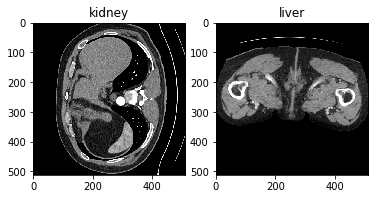

In [32]:
kidney_img = kidney_volume_array[:, :, 0]
liver_img = liver_volume_array[0, :, :]

fig, axes = plt.subplots(1, 2)
axes[0].imshow(kidney_img, 'gray')
axes[0].set_title('kidney')
axes[1].imshow(liver_img, 'gray')
axes[1].set_title('liver')